# Prepare notebook and load preprocessed tweets
Tweets have been preprocessed as follows:
* Remove a range of non-word characters
* Remove URLS
* Remove usernames
* Remove hashtags
* Tokenized and lemmatized (Stanza)
* Removed stopwords (NLTK)
* Only kept part-of-speech equalt to 'NOUN', 'PROPN' (proper noun) and 'VERB'
* Lowercase and remove digits as well as words less than 4 characters long

In [86]:
import tweepy
import jsonpickle
from collections import defaultdict
import json
import nltk 
import pandas as pd
import re
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
#from nltk.corpus import stopwords.
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer # Porter is used below. This is an alternative, harsher stemmer. 
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
import stanza

from datetime import datetime 
import pickle
from tqdm.auto import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/laurajorgensen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/laurajorgensen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/laurajorgensen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/laurajorgensen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [87]:
pip install stanza

Note: you may need to restart the kernel to use updated packages.


In [2]:
### Set path to directories
#from pathlib import Path
#_nb = Path(Path.cwd()) # Path of the notebook
#_data = _nb.parent / 'Data' / '1. NGO' / 'Processed tweets' # Path to the preprocessed tweets

In [3]:
### Load preprocessed tweets

#fname = 'alle_de_voksne_200521.csv' # Name of file
#with open(_data / fname, 'rb') as handle:
 #   df = pickle.load(handle)
#len(df)

## Reading data

In [89]:
tweetsdf = pd.read_csv('fam_030621.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,3,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [90]:
tweetsdf.head(1)

,Unnamed: 0,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,0,Alternativet,alternativet_,1704527995,NaN,"Alternativet er for mennesker, der ønsker en s...",30210.0,3816.0,29702.0,Tue Aug 27 11:53:50 +0000 2013,1.400352e+18,Thu Jun 03 07:19:50 +0000 2021,True,"Vi skal give familierne omsorg, så de får over...","['Mira81743596', 'alternativet_', 'informeren']","['bæredygtigtliv', 'dkpol']",NHOERUP


In [91]:
tweetsdf.shape

(37210, 17)

In [92]:
tweetsdf['is_retweet'].value_counts(sort=True)

True     22380
False    14829
Name: is_retweet, dtype: int64

In [93]:
#Removing duplicated tweets 
tweetsdf = tweetsdf.drop_duplicates(subset = 'tweet_id')

#Checking new dataset shape 
tweetsdf.shape

(37210, 17)

In [94]:
#Making sure tweet_txt is string objects
tweetsdf = tweetsdf.astype({"tweet_txt": str})

In [95]:
tweetsdf.head(1)

,Unnamed: 0,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,0,Alternativet,alternativet_,1704527995,NaN,"Alternativet er for mennesker, der ønsker en s...",30210.0,3816.0,29702.0,Tue Aug 27 11:53:50 +0000 2013,1.400352e+18,Thu Jun 03 07:19:50 +0000 2021,True,"Vi skal give familierne omsorg, så de får over...","['Mira81743596', 'alternativet_', 'informeren']","['bæredygtigtliv', 'dkpol']",NHOERUP


In [7]:
#Preprocessing 
dk_sw = nltk.corpus.stopwords.words('danish')
pipeline = stanza.Pipeline('da')

def tw_preproc(string): 
    nlp = pipeline(string) # Not tokenized
    proc_text = [word.lemma for sentence in 
                 nlp.sentences for word in sentence.words if 
                 (word.text not in dk_sw) and (word.pos in ['NOUN', 'PROPN', 'VERB'])]
    proc_text = [word.casefold() for word in proc_text if (word.isdigit()==False) 
                 and (len(word)>3)]
    return ' '.join(proc_text)


#df['stanza_proc_text'] = df.tweet_txt.apply(lambda text: tw_preproc(text))

2021-06-05 09:07:00 INFO: Loading these models for language: da (Danish):
| Processor | Package |
-----------------------
| tokenize  | ddt     |
| pos       | ddt     |
| lemma     | ddt     |
| depparse  | ddt     |

2021-06-05 09:07:00 INFO: Use device: cpu
2021-06-05 09:07:00 INFO: Loading: tokenize
2021-06-05 09:07:00 INFO: Loading: pos
2021-06-05 09:07:00 INFO: Loading: lemma
2021-06-05 09:07:01 INFO: Loading: depparse
2021-06-05 09:07:01 INFO: Done loading processors!


In [97]:
#and the access its now method simpler
d1 = datetime.now()
d1

datetime.datetime(2021, 6, 13, 1, 11, 52, 523813)

In [28]:
print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " Preprocessing begun.") #Printing start time

tqdm.pandas() #Getting a progress bar. Use progress_apply instead of apply.
tweetsdf['stanza_proc_text'] = tweetsdf.tweet_txt.progress_apply(lambda text: tw_preproc(text))

print(datetime.now().strftime('%Y-%m-%d %H:%M:%S') + " Preprocessing completed.") #Printing end time

2021-06-05 10:27:13 Preprocessing begun.



2021-06-06 13:41:42 Preprocessing completed.


In [98]:
tweetsdf.head(1)

,Unnamed: 0,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user
0,0,Alternativet,alternativet_,1704527995,NaN,"Alternativet er for mennesker, der ønsker en s...",30210.0,3816.0,29702.0,Tue Aug 27 11:53:50 +0000 2013,1.400352e+18,Thu Jun 03 07:19:50 +0000 2021,True,"Vi skal give familierne omsorg, så de får over...","['Mira81743596', 'alternativet_', 'informeren']","['bæredygtigtliv', 'dkpol']",NHOERUP


In [100]:
stanza_text = tweetsdf['tweet_txt']

In [101]:
type(stanza_text)

pandas.core.series.Series

In [102]:
#tweetsdf.to_csv('preprocesseddata060621.csv')

In [103]:
tweetsPCA = pd.read_csv('preprocesseddata060621.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,4,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [104]:
print(tweetsPCA.iloc[2].screen_name)
print('------')

alternativet_
------


In [105]:
print(tweetsPCA.iloc[2].tweet_txt)
print('------')


På lørdag kl. 16.40 kan du høre vores politisk leder @FranciskaRosenk holde grundlovstale i Ørestaden. Kom frisk og nyd musik, mad og gode politiske debatter 💚#dkpol https://t.co/vpd0GIcHcu
------


In [106]:
print(tweetsPCA.iloc[2].stanza_proc_text)
print('------')

lørdag klokke høre leder franciskarosenk holde grundlovstale ørestaden komme nyde musik debat
------


In [107]:
tweetsPCA.head(1)

,Unnamed: 0,Unnamed: 0.1,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user,stanza_proc_text
0,0,0,Alternativet,alternativet_,1704527995,NaN,"Alternativet er for mennesker, der ønsker en s...",30210.0,3816.0,29702.0,Tue Aug 27 11:53:50 +0000 2013,1.400352e+18,Thu Jun 03 07:19:50 +0000 2021,True,"Vi skal give familierne omsorg, så de får over...","['Mira81743596', 'alternativet_', 'informeren']","['bæredygtigtliv', 'dkpol']",NHOERUP,give familie omsorg overskud give natur omsorg...


# Identify local word associations # 


In [108]:
tweetsPCA['stanza_proc_text']

0        give familie omsorg overskud give natur omsorg...
1        å-fane sted #klimalovbrud demo kandidat kommun...
2        lørdag klokke høre leder franciskarosenk holde...
3           brandtale torstengejl liberal alliance bedring
4                                                      NaN
                               ...                        
37205    skolevalg facebook spørge elev samsøgade skole...
37206    stat opgave bestemme tobak købe bestemme #ungd...
37207              øbhaarde redde skam seer sige folketing
37208       #skolevalg17 glæde spre budskab hundrede debat
37209    @radikalungdom dsun ku_dk liberalungdomdk vung...
Name: stanza_proc_text, Length: 37210, dtype: object

In [109]:
tweetsPCA.dropna(subset = ['stanza_proc_text'], inplace=True)

In [111]:
tweetsPCA.head(1)

,Unnamed: 0,Unnamed: 0.1,name,screen_name,id_str,location,description,followers_count,friends_count,statuses_count,user_created_at,tweet_id,tweet_created_at,is_retweet,tweet_txt,mentions,hashtags,retweet_user,stanza_proc_text
0,0,0,Alternativet,alternativet_,1704527995,NaN,"Alternativet er for mennesker, der ønsker en s...",30210.0,3816.0,29702.0,Tue Aug 27 11:53:50 +0000 2013,1.400352e+18,Thu Jun 03 07:19:50 +0000 2021,True,"Vi skal give familierne omsorg, så de får over...","['Mira81743596', 'alternativet_', 'informeren']","['bæredygtigtliv', 'dkpol']",NHOERUP,give familie omsorg overskud give natur omsorg...


In [112]:
#Converting to string
tweetsPCA = tweetsPCA.astype({'tweet_created_at': str})

In [113]:
#Turning to dt object
tweetsPCA['tweet_created_at'] = tweetsPCA['tweet_created_at'].astype('datetime64[ns]') 
tweetsPCA['tweet_created_at'] = tweetsPCA.tweet_created_at.dt.to_pydatetime()

In [114]:
#Subsetting to only get data from 2019 and onwards 
tweetPCA20192021 = tweetsPCA.loc[tweetsPCA.tweet_created_at > datetime(2018,12,31)]

In [115]:
#checking lenght of subset 
len(tweetPCA20192021)

22498

In [116]:
### Identify whether each word appear in each tweet or not

# The column proc_text holds the preprocessed tweet

#importing relevant packages 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(ngram_range=(1,1)) # Instantiante the counting class
doc2type = vectorizer.fit_transform(tweetPCA20192021.stanza_proc_text) # Count the number of times each word type appear in each tweet
doc2type[doc2type>0] = 1 # Restrict count to 1, i.e. we get the tweet-frequency of each word (how many tweets it appear in) 
type_names = np.array(vectorizer.get_feature_names()) # Get the sequence of words according to how they are counted
n_docs, n_types = doc2type.shape


In [117]:
#Checking number of docs and types 
n_docs, n_types

(22498, 23727)

In [118]:
# Example of counting
print(tweetPCA20192021.stanza_proc_text[5])
for word in tweetPCA20192021.stanza_proc_text[5].split(' '):
    print('{}: {}'.format(word, doc2type[5, vectorizer.vocabulary_[word]]))

afslutning folketingsår torsten gejl konkludere slags sejr nederlag smil alternativ holde fane bevægelse
afslutning: 1
folketingsår: 1
torsten: 1
gejl: 1
konkludere: 1
slags: 1
sejr: 1
nederlag: 1
smil: 1
alternativ: 1
holde: 1
fane: 1
bevægelse: 1


In [119]:
### Identify (in)frequent words

# Determine absolute threshold
abs_th = 5

# Calculate the tweet-frequency of each word
type_doc_freq = np.squeeze(np.asarray(np.sum(doc2type, axis=0)/n_docs))

# Identify indices of words that meet the threshold - returns boolean (True/False) array of length = number of words 
type_mask = type_doc_freq >= abs_th/n_docs

# Identify the indices of words that meet the threshold
type_mask_idx = np.arange(n_types)[type_mask]

# Print number and share of words that meet criteria
print('{} words ({:0.0f}%) appear in at least {} tweets'.format(sum(type_mask), 100*sum(type_mask)/n_types, abs_th))

5016 words (21%) appear in at least 5 tweets


In [34]:
### Calculate association between words
import scipy.sparse as sp

# Calculate the binarized type co-occurence matrix
type_cooc = doc2type.T @ doc2type

# Calculate the co-occurence tweet-frequency
cooc_doc_freq = type_cooc / n_docs # Does not sum to one, as one terms occurence in a tweet does not exclude others

In [35]:
# Divide observed co-occurence frequency with product of marginal word frequencies 
# (expected co-occurence if 'independent')and scale with actual frequency, to give 
# less weight to infrequent co-occurences
type_cooc_assoc = cooc_doc_freq.multiply(sp.csr_matrix(
                                        cooc_doc_freq / 
                                        (sp.csr_matrix(type_doc_freq).T @ sp.csr_matrix(type_doc_freq)))) 

# Drop self-association
type_cooc_assoc = type_cooc_assoc - sp.dia_matrix((type_cooc_assoc.diagonal()[np.newaxis, :], [0]),
                                                  shape=type_cooc_assoc.shape)

In [52]:
### Restrict to local neighborhood

# Define key terms
key_type = ['klima', 'grøn', 'bæredygtig','#dkgreen', 'miljø', 'natur']

# Identify all words that include the key terms as substrings (e.g.'klima' is in 'klimakrise')
extended_key_type = np.array([trm for trm in vectorizer.get_feature_names() 
                              if any(s_trm in trm for s_trm in key_type)])
print(extended_key_type)

# Identify indices of extended key terms
ktype_idx = np.array([vectorizer.vocabulary_.get(ktype) for ktype in extended_key_type])

# Identify word associations around the extended key terms 
ktype_assoc = type_cooc_assoc[ktype_idx,:]

# Get weight the extended key words according to how often they appear
extended_key_type_occurence = np.sum(doc2type[:,ktype_idx], axis=0)
extended_key_type_weight = extended_key_type_occurence / np.sum(extended_key_type_occurence)

# Weight the associations and squeeze to one-dimensional array
weighted_ktype_assoc = extended_key_type_weight @ ktype_assoc
weighted_ktype_assoc = np.squeeze(np.asarray(weighted_ktype_assoc))

# Find the sequence of indices that sort the words associated with the extended key types
sidx = np.argsort(weighted_ktype_assoc)

# Remove infrequent words and the extended key types from sorted index
sidx = np.array([idx for idx in sidx if (idx in type_mask_idx) and (idx not in ktype_idx)])

# Determine size of local neighborhood; can't be greater than number of words with non-zero association
n_ktype_assoc = min(400, sum(weighted_ktype_assoc[sidx]>0))
print(n_ktype_assoc)

# Select nearest (highest) associations
assoc_idx =  sidx[-n_ktype_assoc:]

# Get local association matrix
assoc_matr = type_cooc_assoc[assoc_idx,:][:,assoc_idx]

# Print most associated words
print(type_names[assoc_idx])

['4klimakrav' '8naturstyrelse' 'adknature' 'aklimakrise' 'aklimaraad'
 'akrydsforklima' 'altingetklima' 'anaturstyrelse' 'antiklimaks'
 'arbejdsmiljø' 'arbejdsmiljødag' 'arbejdsmiljøindsats' 'arbejdsmiljølov'
 'arbejdsmiljølovgivning' 'arbejdsmiljøordfører' 'arbejdsmiljørepræsent'
 'arbejdsmiljørepræsentant' 'arbejdsmiljøudspil'
 'averdensbedsteklimalovadkimare' 'bandemiljø' 'bindendeklimalov'
 'bynatur' 'bæredygtighed' 'bæredygtighedakrav' 'bæredygtighedsklasse'
 'bæredygtighedskrav' 'bæredygtighedsproblem' 'bæredygtighedsstrategi'
 'bæredygtigkrav' 'børnemiljølov' 'danmarksnatur' 'dengrønnebetænkning'
 'dengrønnestudenterbevægelse' 'dkklima' 'dknatur' 'dknaturn'
 'eklimaraade' 'enewdealfornatur' 'estrikefornatur' 'fagmiljø'
 'folketsklimamarch' 'forskningsmiljø' 'fremtidenergrøn' 'givnaturenplad'
 'godtarbejdsmiljønu' 'grøn' 'grønbetydernu' 'grønbetænkning' 'grønenergi'
 'grønfredaggrønfremtid' 'grønfremtid' 'grønfærge' 'grøngenforhandling'
 'grøngenstart' 'grønland' 'grønlandsudvalg

# Create actor-term matrix

In [54]:
### Count the number of times each actor use each word

sidx = np.argsort(np.array(tweetPCA20192021.screen_name)) # list of indices that would sort by screen_name, 
                                                          # which is the column of the party/actor name

# Identify unique actor names and where actor name changes in sorted list
actor_names, grp_start_idx = np.unique(np.array(tweetPCA20192021.screen_name)[sidx], return_index=True) 

# Sum word count for all tweets by each actor
actor2type = np.add.reduceat(doc2type[sidx,:].toarray(), grp_start_idx) 
n_actors = actor2type.shape[0]

In [55]:
### Scale the count data

# Here, we calculate frequency, and scale frequencies for each word

# Calculate how frequent each actor use each word
actor2type_frequency = actor2type/actor2type.sum(axis=1)[:, np.newaxis]

In [56]:
actor2type_frequency

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.02160447e-05, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.02160447e-05, 0.00000000e+00]])

In [57]:
# Scale frequency within each associated word (zero mean, unit variance)

from sklearn.preprocessing import StandardScaler

standardized_actor2type_frequency = StandardScaler().fit_transform(actor2type_frequency[:, assoc_idx])

In [58]:
# See the raw counts
pd.DataFrame(actor2type[:,assoc_idx], index = actor_names, columns = type_names[assoc_idx])

,fart,nordic,værktøjskasse,arladanmark,medlemsland,modtagelse,varm,skib,michaelsvarer,håndværk,...,havs,rød,biodiversitetsråd,delmål,løse,borgerforslag,biodiversitet,skov,binde,ådkgre
AlternativeUnge,1,1,0,0,1,1,1,0,1,1,...,1,0,0,3,25,10,7,7,1,269
DFUngdom,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
DSU_1920,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,4,0,0,0,0,9
DanskDf1995,0,2,0,0,4,1,0,0,0,0,...,0,0,0,0,21,7,0,3,1,8
Enhedslisten,1,2,0,0,1,2,1,1,0,1,...,4,7,4,11,24,17,12,17,16,281
KU_DK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
KonservativeDK,1,0,1,1,0,1,0,0,0,0,...,0,0,0,3,5,2,0,0,2,37
LiberalAlliance,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,10,0,1,1,0,16
LiberalUngdomDK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,6
SF_Ungdom,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,1,26


In [59]:
# See the standardized word frequencies
pd.DataFrame(standardized_actor2type_frequency, index = actor_names, columns = type_names[assoc_idx])

,fart,nordic,værktøjskasse,arladanmark,medlemsland,modtagelse,varm,skib,michaelsvarer,håndværk,...,havs,rød,biodiversitetsråd,delmål,løse,borgerforslag,biodiversitet,skov,binde,ådkgre
AlternativeUnge,-0.316645,0.089507,-0.380678,-0.430874,0.148503,0.957273,3.062954,-0.415606,2.340771,1.355299,...,1.711750,-0.253852,-0.406550,0.669646,-0.019941,-0.112036,1.274204,0.642124,-0.516267,1.939697
DFUngdom,-0.576998,-0.311181,-0.380678,-0.430874,4.052878,-0.767730,-0.477865,-0.415606,-0.388386,-0.424219,...,-0.405154,-0.253852,-0.406550,-0.679933,-0.556452,-0.321564,-0.524243,0.851653,-0.778006,-0.978035
DSU_1920,-0.576998,-0.311181,-0.380678,-0.430874,-0.407927,-0.767730,-0.477865,-0.415606,-0.388386,3.797087,...,-0.405154,-0.253852,-0.406550,-0.679933,-0.352821,-0.321564,-0.524243,-0.800318,-0.778006,-0.746466
DanskDf1995,-0.576998,0.017046,-0.380678,-0.430874,0.503681,-0.061206,-0.477865,-0.415606,-0.388386,-0.424219,...,-0.405154,-0.253852,-0.406550,-0.679933,-0.371868,-0.261491,-0.524243,-0.547121,-0.670804,-0.942495
Enhedslisten,-0.459966,0.049049,-0.380678,-0.430874,-0.157804,0.783094,1.113780,1.323542,-0.388386,0.375698,...,3.401151,-0.003176,3.367935,1.544463,-0.324930,-0.161448,0.861629,0.774359,1.104479,0.392033
KU_DK,-0.576998,-0.311181,-0.380678,-0.430874,-0.407927,-0.767730,-0.477865,-0.415606,-0.388386,-0.424219,...,-0.405154,-0.253852,-0.406550,-0.679933,0.178198,-0.321564,-0.524243,-0.800318,-0.778006,-0.978035
KonservativeDK,-0.116001,-0.311181,3.545525,3.901971,-0.407927,2.286664,-0.477865,-0.415606,-0.388386,-0.424219,...,-0.405154,-0.253852,-0.406550,1.709712,-0.366456,-0.247363,-0.524243,-0.800318,0.148897,-0.267427
LiberalAlliance,-0.165428,-0.311181,-0.380678,-0.430874,0.471685,-0.767730,-0.477865,-0.415606,-0.388386,-0.424219,...,-0.405154,-0.253852,-0.406550,-0.679933,-0.217203,-0.321564,-0.118099,-0.474571,-0.778006,-0.703692
LiberalUngdomDK,-0.576998,-0.311181,-0.380678,-0.430874,-0.407927,-0.767730,-0.477865,-0.415606,-0.388386,-0.424219,...,-0.405154,-0.253852,-0.406550,-0.679933,0.632655,-0.321564,-0.524243,-0.800318,-0.778006,0.824971
SF_Ungdom,-0.576998,-0.311181,-0.380678,-0.430874,-0.407927,-0.767730,-0.477865,-0.415606,-0.388386,-0.424219,...,-0.405154,-0.253852,-0.406550,2.448600,-0.407206,-0.175848,-0.524243,0.632741,1.042252,0.983203


# Perform and assess PCA

   * Opt. 1: Singular Value Decomposition (SVD) 
   * Opt. 2: PCA implementation in Scikit-Learn
   

In [60]:
## Option 1. Perform Singular Value Decomposition (SVD)
U, s, VT = np.linalg.svd(standardized_actor2type_frequency, full_matrices=False) #Perform SVD on 
                                                                                 # standardized frequencies

S = np.diag(s) # s is array of singular values, convert to diagonal matrix

# Obtain (standardized) principal component scores - not directly comparable to sklearn, that yields U@S
# Given we re-scale in next step, scaling U by sqrt(n-1) does not make a difference   
PC = U*np.sqrt(n_actors-1) # Columns of PC are the standardized scores

# Standardize by maximum absolute value on each dimension
scaled_PC = PC / np.max(abs(PC), axis=0)

# Obtain standardized term loadings (maps from PC to feature space)
L = VT.T@S/np.sqrt(n_actors-1) # Only unique up to a factor, so sign (direction) may change compared to 
                               # other implementations

# Obtain word weights (maps from feature to PC space)
W = (VT.T@np.linalg.inv(S))*np.sqrt(n_actors-1)

# Get eigenvalues of correlation matrix
eigen_values = np.diag(S@S)/(S.shape[0]-1)

# Calculate proportion of captured variance
explained_variance = eigen_values / np.sum(eigen_values)

In [61]:
## Option 2. Use the PCA implementation in Scikit-Learn: 
from sklearn.decomposition import PCA

# Instantiate the PCA class
pca = PCA(n_components=n_actors) 

# Return unstandardized PC scores (i.e. U@S from SVD)
raw_PC = pca.fit_transform(standardized_actor2type_frequency) 

# Get singular values
S = np.diag(pca.singular_values_)

# Get standardized PC scores
PC = raw_PC@np.linalg.inv(S)*np.sqrt(n_actors-1) 

# Scale PC scores
scaled_PC = PC / np.max(abs(PC), axis=0) 

# Obtain standardized term loadings (maps from PC to feature space)
L = pca.components_.T@S/np.sqrt(n_actors-1)

# Obtain word weights (maps from feature to PC space)
W = (pca.components_.T@np.linalg.inv(S))*np.sqrt(n_actors-1) # Get word weights (maps from feature to PC space)

# Get proportion of captured variance
explained_variance = pca.explained_variance_ratio_

In [62]:
### Example of relations between original data and PC scores
# NB: PCs are only unique up to a constant, so the sign (direction) can change

## From original data to PC scores

# The inner product (sumproduct) of the third party's standardized word frequencies and the word 
# loadings on the second PC
print(sum(standardized_actor2type_frequency[2,:]*W[:,1])) 

# The second PC score of the third party
print(PC[2,1])  

## From PC scores to original data

# The inner product (sumproduct) of the third party's PC scores and the loadings of the fourth word
print(sum(PC[2,:]*L[3,:]))

# The fourth standardized word frequency of the third party
print(standardized_actor2type_frequency[2,3]) 

0.15214611979126555
0.15214611979126294
-0.4308742395737134
-0.43087423957371446


In [69]:
### Inspect loadings

# For unit-scaled features, they are the correlation between the standardized PCs and the features
# I.e. how much does each words standardized frequency correlate with each PC dimension

print(L.max())
print(L.min())

pd.DataFrame(L, index=type_names[assoc_idx], columns=['PC{}'.format(d) for d in range(1,L.shape[1]+1)])

0.9507473921391718
-0.7254057529906036


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
fart,-0.004564,-0.032627,0.307146,-0.035729,0.586239,0.438907,0.214808,-0.110389,-0.007083,-0.280292,-0.280412,-0.357788,0.247579,-0.116294,-0.018216,0.006760,-0.021486,-0.057412,3.814326e-16
nordic,-0.075836,-0.058122,0.514269,0.117935,0.725320,-0.026214,0.313371,0.356764,-0.023576,0.004145,0.074668,-0.030972,-0.033418,0.060785,-0.023528,-0.023517,-0.009644,0.051652,-1.566143e-16
værktøjskasse,0.111372,-0.245706,-0.278537,-0.182600,-0.139591,0.261396,0.036050,0.282104,-0.053681,-0.262101,0.405969,-0.221621,0.348302,0.237738,-0.437232,0.138043,-0.171163,-0.017220,-1.514127e-16
arladanmark,0.163006,-0.105395,-0.281540,-0.109721,-0.014681,0.152507,-0.045085,0.030796,-0.016455,-0.228084,0.616366,-0.206310,0.440560,0.270326,-0.380924,0.080984,0.017990,-0.078742,1.158590e-16
medlemsland,-0.106848,0.119223,-0.097360,-0.001221,-0.060909,0.017514,-0.126893,0.080303,0.154739,0.069162,0.162683,-0.026298,-0.392791,-0.507029,-0.281554,-0.603059,-0.235580,-0.167865,-4.631617e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
borgerforslag,-0.204298,0.315178,-0.106218,0.560564,-0.318033,-0.019455,0.642929,-0.008722,0.085940,0.143419,-0.056114,0.034003,0.176238,0.083548,-0.012949,0.058012,0.003892,-0.012697,1.371031e-18
biodiversitet,0.892045,0.133883,-0.003117,0.265428,0.061881,-0.232591,-0.024124,-0.161031,-0.241377,0.030759,-0.039047,-0.085379,-0.017122,-0.023678,-0.031841,0.062311,-0.098128,-0.059855,1.697316e-17
skov,0.483362,-0.302702,-0.076192,-0.214511,-0.085201,-0.509985,0.202499,-0.277873,-0.199298,0.279972,-0.106612,-0.090912,-0.217303,-0.149152,-0.184795,-0.171572,-0.045789,-0.141490,3.354269e-17
binde,0.336235,-0.657581,-0.052063,-0.207444,-0.193949,-0.131760,0.203865,-0.135449,-0.160991,-0.087366,-0.378198,-0.314796,0.112714,-0.014461,-0.212851,0.107083,-0.053877,-0.034520,4.563549e-17


In [64]:
# Calculate the cumulative amount of variance captured 
cumulative_variance = np.cumsum(explained_variance)

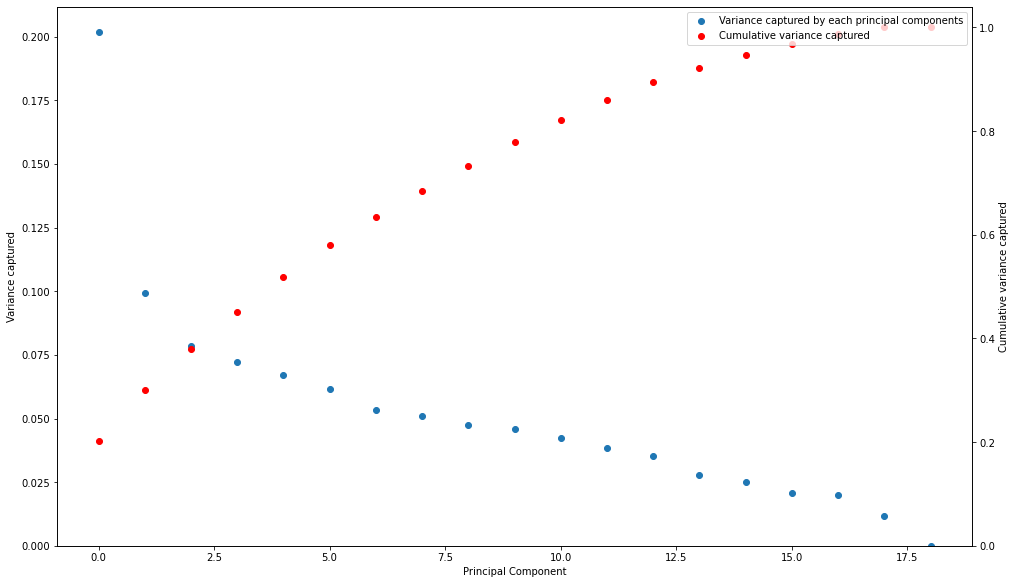

In [65]:
### Assess the amount of variance captured by each principal components
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Plot the amount of variance captured by each principal components
sc1 = ax.scatter(range(n_actors), explained_variance, label='Variance captured by each principal components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance captured')
ax.set_ylim(ymin=0)

# Plot the cumulative amount of variance captured on second y-axis
ax2 = ax.twinx()  # Create second y-axis
sc2 = ax2.scatter(range(n_actors), cumulative_variance, color='red', label='Cumulative variance captured')
ax2.set_ylabel('Cumulative variance captured')
ax2.set_ylim(ymin=0)

plt.legend(handles = [sc1, sc2], loc=1)
plt.show()

# Plot the socio-symbolic constellation

In [66]:
### Identify the types that loads most on each principal dimension

# Determine how many words to plot in each direction
n_terms = 15

# Identify the indices that sorts the two first components
PCa_load_sidx = L[:,0].argsort()
PCb_load_sidx = L[:,1].argsort()

# Find the terms that load most on the first principal component
PCa_plot_idx = np.concatenate((PCa_load_sidx[:n_terms], PCa_load_sidx[-n_terms:]))

# Identify remaining indices
remain_idx = np.array([idx for idx in PCb_load_sidx if idx not in PCa_plot_idx])

# Find the remaining terms that load most on the second principal component
PCb_plot_idx = np.concatenate((remain_idx[:n_terms], remain_idx[-n_terms:]))

# Combine the indices
PC_plot_idx = np.unique(np.concatenate((PCa_plot_idx, PCb_plot_idx)))

# Get the term names
PC_plot_names = type_names[assoc_idx][PC_plot_idx]

# Get the term loadings
PC_plot_load = L[PC_plot_idx,:]

In [67]:
pip install adjustText

Note: you may need to restart the kernel to use updated packages.


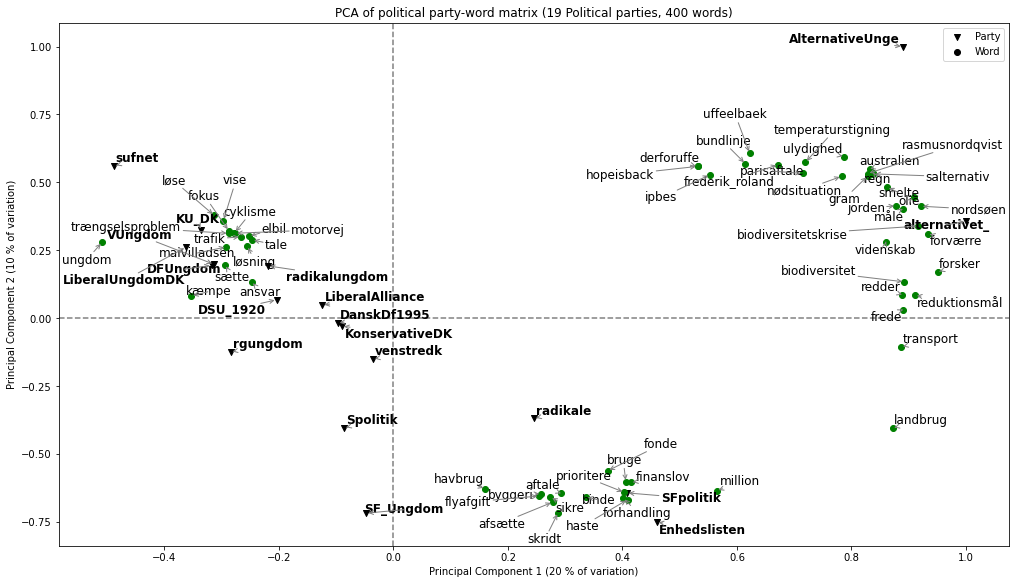

In [83]:
### Plot the socio-symbolic constellation

from adjustText import adjust_text
fig, ax = plt.subplots(1,1, figsize = (14,8), constrained_layout=True)

# Title and label text 
ax.set_title('PCA of political party-word matrix ({} Political parties, {} words)'.format(standardized_actor2type_frequency.shape[0],
                                                                                          standardized_actor2type_frequency.shape[1],
                                                                                          fontsize = 20,
                                                                                          fontweight='bold'))

ax.set_xlabel('Principal Component 1 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[0],
                                                                      fontsize = 15))

ax.set_ylabel('Principal Component 2 ({:0.0f} % of variation)'.format(100*pca.explained_variance_ratio_[1],
                                                                      fontsize = 15))

# Grid to mark zero loading             
ax.axvline(x=0, c='grey', linestyle='--')
ax.axhline(y=0, c='grey', linestyle='--')
       
# Plot standardized principal component scores
ax.scatter(scaled_PC[:,0], scaled_PC[:,1], marker = 'v', label='Party', c='black')

# Plot word loadings
ax.scatter(PC_plot_load[:,0], PC_plot_load[:, 1], marker = 'o', label='Word', c='g')

# Annotate the plot
texts = []
for x, y, txt in zip(scaled_PC[:,0], scaled_PC[:,1], actor_names):
    texts.append(plt.text(x, y, txt, size=12, weight='bold'))


for x, y, txt in zip(PC_plot_load[:,0], PC_plot_load[:,1], PC_plot_names):
    texts.append(plt.text(x, y, txt, size=12))

# Adjusting labels to allow for better readability
# setting arrows to point from label to actual datapoint in plot
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey')) 

# Set legend to black
plt.legend()
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('black')
             
# Saving figure
plt.savefig('PCA')

# Printing
plt.show()